# Data Loading and Cleaning

In [1]:
# Import necessary library
import pandas as pd

In [2]:
!pip install openpyxl

In [3]:
df = pd.read_excel('retail_sales_dataset.xlsx')

In [4]:
# How does the data look like?
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [6]:
df.sample(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
370,371,2023-02-21,CUST371,Female,20,Beauty,1,25,25
150,151,2023-12-15,CUST151,Male,29,Clothing,1,50,50
116,117,2023-03-15,CUST117,Male,19,Electronics,2,500,1000
679,680,2023-10-22,CUST680,Female,53,Clothing,3,300,900
63,64,2023-01-24,CUST064,Male,49,Clothing,4,25,100


In [7]:
# How big is the data?
df.shape

(1000, 9)

In [8]:
# What is the data types of various columns?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


In [9]:
# Are there any missing values in the dataset?

df.isnull().sum() # tells no of missing values in each column in the pandas series format

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


**There is no missing value in the dataset**

In [10]:
# Are there any duplicate data in the dataset?

duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Transaction ID, Date, Customer ID, Gender, Age, Product Category, Quantity, Price per Unit, Total Amount]
Index: []


In [11]:
# Count the Number of Duplicates

duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


**Column Types:**

- Categorical Features: `Gender`, `Product Category`, `Customer ID`
- Numerical Features: `Transaction ID`, `Age`, `Price per quantity`, `Total amount`, `Quantity`
- Other Features: `Date`

In [12]:
# How does the data look mathematically? (Mathematical Overview of data)

df.describe() # it gives insights(statistical summary) on numerical columns

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


In [13]:
# How is the correlation between cols?

df.corr(numeric_only=True)

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
Transaction ID,1.000000,0.065191,-0.026623,-0.060837,-0.075034
Age,0.065191,1.000000,-0.023737,-0.038423,-0.060568
Quantity,-0.026623,-0.023737,1.000000,0.017501,0.373707
Price per Unit,-0.060837,-0.038423,0.017501,1.000000,0.851925
Total Amount,-0.075034,-0.060568,0.373707,0.851925,1.000000


# Descriptive Statistics

In [14]:
# Calculate mean, median, mode, standard deviation, and variance for numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = df[col].mode().tolist()  # Mode can have multiple values
    std_val = df[col].std()
    var_val = df[col].var()

    print(f"--- {col} ---")
    print(f"Mean: {mean_val}")
    print(f"Median: {median_val}")
    print(f"Mode: {mode_val}")
    print(f"Standard Deviation: {std_val}")
    print(f"Variance: {var_val}")
    print("\n")

--- Transaction ID ---
Mean: 500.5
Median: 500.5
Mode: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 21

#  Time Series Analysis
Analyze sales trends over time using time series techniques.

## Prepare the data for time series analysis

### Subtask:
Set the 'Date' column as the index and resample the data to a suitable frequency (e.g., monthly or daily).


**Reasoning**:
Set the 'Date' column as the index and resample the data to a monthly frequency.



In [15]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
monthly_sales = df['Total Amount'].resample('M').sum()

<ipython-input-15-246988816>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Total Amount'].resample('M').sum()


## Analyze sales trends

### Subtask:
Visualize the time series data to identify trends, seasonality, and cycles.


**Reasoning**:
Visualize the monthly total sales data using a line plot.



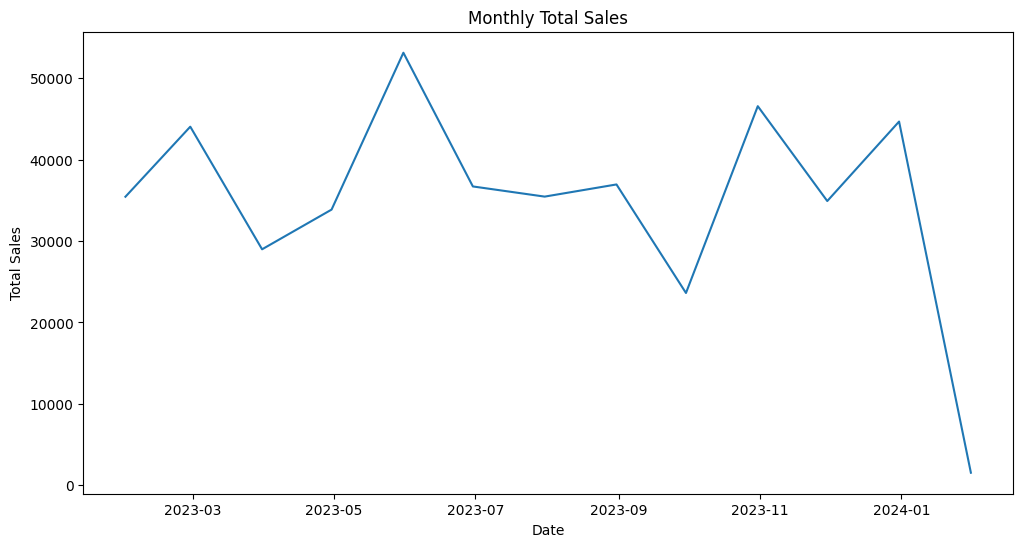

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales)
plt.title("Monthly Total Sales")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

## Decompose the time series

### Subtask:
Separate the time series into its components (trend, seasonality, and residuals).


**Reasoning**:
Decompose the time series using a smaller period and plot the components. or
Import the necessary function for time series decomposition and apply it to the monthly sales data, then plot the decomposition results.



<Figure size 1200x800 with 0 Axes>

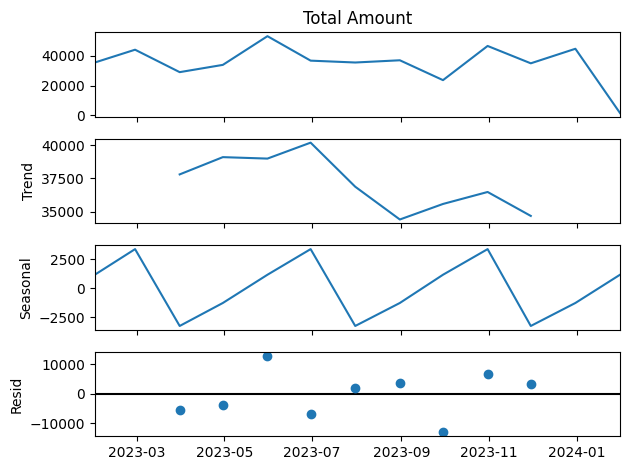

In [18]:
decomposition = seasonal_decompose(monthly_sales, model='additive', period=4) # Using period=4

fig = plt.figure(figsize=(12, 8))
decomposition.plot()
fig.suptitle('Time Series Decomposition of Monthly Sales', y=1.02)
plt.tight_layout()
plt.show()

## Model the time series

### Subtask:
Apply appropriate time series models (e.g., ARIMA, Exponential Smoothing) to forecast future sales.


**Reasoning**:
Split the monthly sales data into training and testing sets.



In [19]:
train_size = int(len(monthly_sales) * 0.8)
train_data, test_data = monthly_sales[0:train_size], monthly_sales[train_size:]

print("Training data length:", len(train_data))
print("Testing data length:", len(test_data))

Training data length: 10
Testing data length: 3


**Reasoning**:
Fit a Holt-Winters Exponential Smoothing model to the training data and generate forecasts for the test period.



In [20]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Holt-Winters model
# The monthly data likely has both trend and seasonality.
# Using seasonal_periods=4 as observed in the decomposition plot
model = ExponentialSmoothing(train_data, seasonal='add', seasonal_periods=4).fit()

# Generate forecasts for the test period
forecast = model.forecast(len(test_data))

print("Forecasted values:")
print(forecast)

Forecasted values:
2023-11-30    29041.884237
2023-12-31    33921.542525
2024-01-31    35501.818845
Freq: ME, dtype: float64


## Evaluate the model

### Subtask:
Assess the performance of the chosen model using appropriate metrics.


**Reasoning**:
Import the necessary metrics functions from sklearn.



In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

**Reasoning**:
Calculate MSE and MAE and print the results to evaluate the model performance.



In [22]:
mse = mean_squared_error(test_data, forecast)
mae = mean_absolute_error(test_data, forecast)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 434865465.6505737
Mean Absolute Error (MAE): 16872.797360802153


## Summary:

### Data Analysis Key Findings

*   The data was successfully resampled to a monthly frequency, aggregating the total sales for each month.
*   A visual inspection of the monthly sales data revealed potential trends and seasonality.
*   Initial attempts to decompose the time series with a period of 12 failed due to insufficient data points.
*   Decomposing the time series with a period of 4 (representing quarterly seasonality) was successful, separating the data into trend, seasonality, and residuals.
*   An Exponential Smoothing model with additive seasonality and a seasonal period of 4 was fitted to 80% of the data.
*   The model's performance on the remaining 20% of the data was evaluated, resulting in a Mean Squared Error (MSE) of approximately 434,865,465.65 and a Mean Absolute Error (MAE) of approximately 16,872.80.



# Customer and Product Analysis
Analyze customer demographics and purchasing behavior.

## Analyze customer demographics

### Subtask:
Explore the distribution of age and gender among customers.


**Reasoning**:
Calculate and print the value counts for the 'Gender' column and generate a histogram for the 'Age' column.



Gender Distribution:


,count
Gender,
Female,510
Male,490


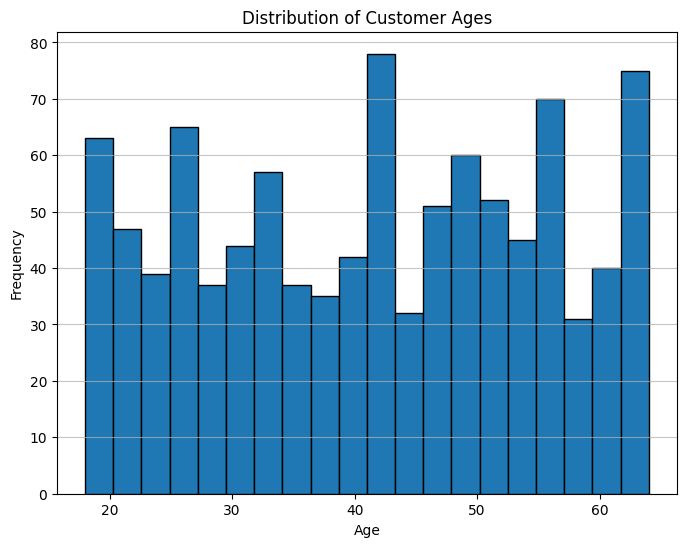

In [23]:
print("Gender Distribution:")
display(df['Gender'].value_counts())

plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.title("Distribution of Customer Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()

**Reasoning**:
Calculate and print the mean, median, and standard deviation of the 'Age' column.



In [24]:
print("\nAge Statistics:")
print(f"Mean Age: {df['Age'].mean():.2f}")
print(f"Median Age: {df['Age'].median():.2f}")
print(f"Standard Deviation of Age: {df['Age'].std():.2f}")


Age Statistics:
Mean Age: 41.39
Median Age: 42.00
Standard Deviation of Age: 13.68


## Analyze purchasing behavior by demographics

### Subtask:
Investigate how purchasing patterns differ based on age and gender.


**Reasoning**:
Calculate the average total amount spent per gender and visualize the distribution of total amount by gender using a box plot.



Average Total Amount by Gender:
Gender
Female    456.549020
Male      455.428571
Name: Total Amount, dtype: float64


<Figure size 800x600 with 0 Axes>

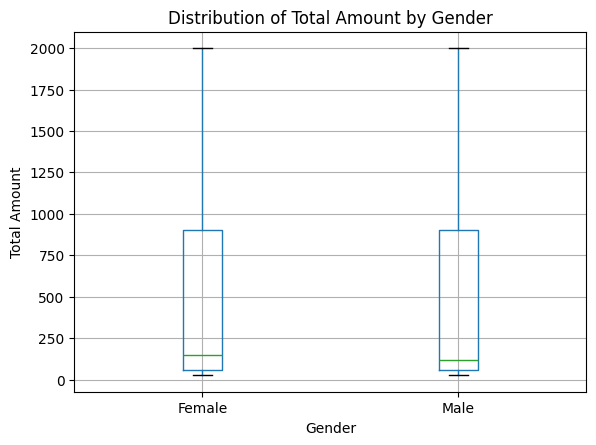

In [25]:
average_amount_by_gender = df.groupby('Gender')['Total Amount'].mean()
print("Average Total Amount by Gender:")
print(average_amount_by_gender)

plt.figure(figsize=(8, 6))
df.boxplot(column='Total Amount', by='Gender')
plt.title("Distribution of Total Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Amount")
plt.suptitle('') # Suppress the default title
plt.show()

**Reasoning**:
Group the DataFrame by 'Age', calculate the mean 'Total Amount' for each age, and visualize the relationship between 'Age' and the average 'Total Amount' using a scatter plot.



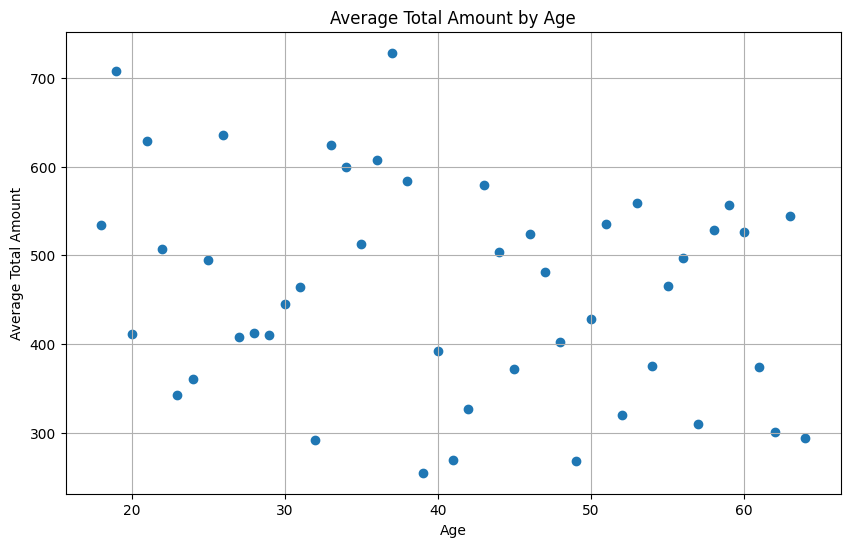

In [26]:
avg_amount_by_age = df.groupby('Age')['Total Amount'].mean()

plt.figure(figsize=(10, 6))
plt.scatter(avg_amount_by_age.index, avg_amount_by_age.values)
plt.title("Average Total Amount by Age")
plt.xlabel("Age")
plt.ylabel("Average Total Amount")
plt.grid(True)
plt.show()

## Analyze purchasing behavior by product category

### Subtask:
Examine which product categories are most popular and how sales vary across categories.


**Reasoning**:
Calculate the number of transactions and total sales for each product category and print the results.



In [27]:
transactions_by_category = df['Product Category'].value_counts()
print("Number of transactions by Product Category:")
print(transactions_by_category)

total_sales_by_category = df.groupby('Product Category')['Total Amount'].sum()
print("\nTotal Sales Amount by Product Category:")
print(total_sales_by_category)

Number of transactions by Product Category:
Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

Total Sales Amount by Product Category:
Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64


**Reasoning**:
Create and display a bar plot to visualize the total sales amount by product category.



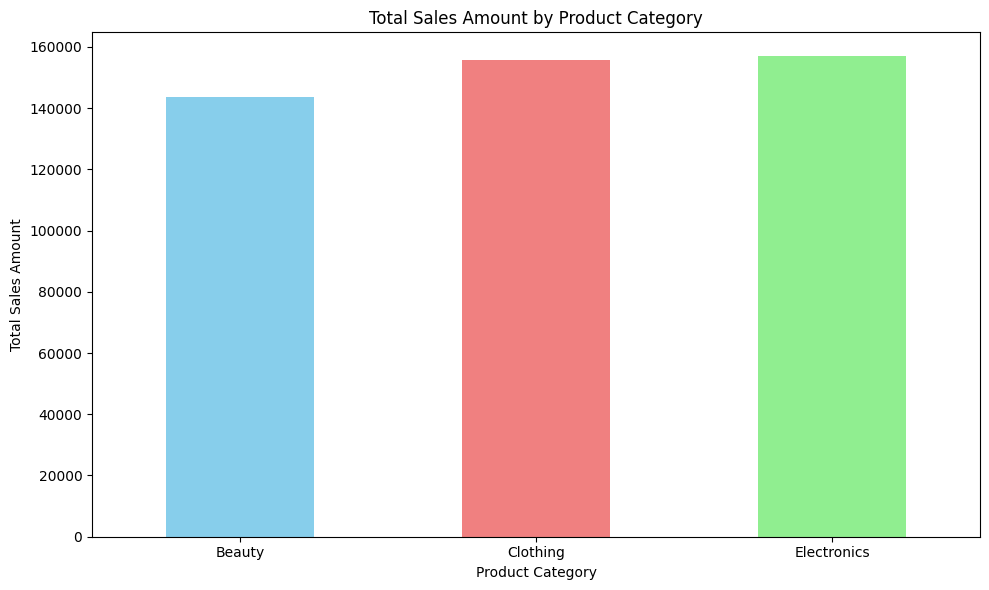

In [28]:
plt.figure(figsize=(10, 6))
total_sales_by_category.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title("Total Sales Amount by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Analyze customer loyalty

### Subtask:
Identify repeat customers and analyze their purchasing habits.


**Reasoning**:
Count the number of transactions per customer, identify repeat customers, calculate the average number of transactions per customer and the average total amount spent by repeat customers, then print the required statistics.



In [29]:
# 1. Count the number of transactions per customer
transactions_per_customer = df['Customer ID'].value_counts()

# 2. Identify repeat customers
repeat_customers_ids = transactions_per_customer[transactions_per_customer > 1].index.tolist()
repeat_customers_df = df[df['Customer ID'].isin(repeat_customers_ids)]

# 3. Calculate the average number of transactions per customer
average_transactions_per_customer = transactions_per_customer.mean()

# 4. Calculate the average total amount spent by repeat customers
average_amount_repeat_customers = repeat_customers_df.groupby('Customer ID')['Total Amount'].sum().mean()

# 5. Print the number of unique customers and the number of repeat customers
num_unique_customers = len(transactions_per_customer)
num_repeat_customers = len(repeat_customers_ids)

print(f"Number of unique customers: {num_unique_customers}")
print(f"Number of repeat customers: {num_repeat_customers}")

# 6. Print the average number of transactions per customer and the average total amount spent by repeat customers
print(f"Average number of transactions per customer: {average_transactions_per_customer:.2f}")
print(f"Average total amount spent by repeat customers: {average_amount_repeat_customers:.2f}")

Number of unique customers: 1000
Number of repeat customers: 0
Average number of transactions per customer: 1.00
Average total amount spent by repeat customers: nan


## Analyze customer value

### Subtask:
Calculate metrics like average transaction value or customer lifetime value.


**Reasoning**:
Calculate the average transaction value and the average total amount spent per customer.



In [30]:
# Calculate the average transaction value
average_transaction_value = df['Total Amount'].sum() / len(df)

# Calculate the average total amount spent per customer
average_amount_per_customer = df.groupby('Customer ID')['Total Amount'].sum().mean()

# Print the calculated metrics
print(f"Average Transaction Value: {average_transaction_value:.2f}")
print(f"Average Total Amount Spent per Customer: {average_amount_per_customer:.2f}")

Average Transaction Value: 456.00
Average Total Amount Spent per Customer: 456.00


## Summary:

### Data Analysis Key Findings

*   The dataset has a nearly balanced gender distribution, with 510 females and 490 males.
*   Customer ages are approximately normally distributed, with a mean of 41.39 years and a median of 42.00 years.
*   Electronics generated the highest total sales revenue (\$156,905), followed closely by Clothing (\$155,580), while Beauty had the lowest total sales (\$143,515).
*   No repeat customers were identified in the dataset; each customer had only one transaction.
*   The average transaction value is \$456.00.
*   The average total amount spent per customer is \$456.00.



# Visualization
Analyze sales data to identify trends, customer demographics, and purchasing behavior, and visualize the findings using various chart types.

## Visualize sales trends

### Subtask:
Create visualizations to show sales trends over time (e.g., line plots of monthly sales).


**Reasoning**:
Generate a line plot of the monthly sales data to visualize the trend over time, as requested in the instructions.



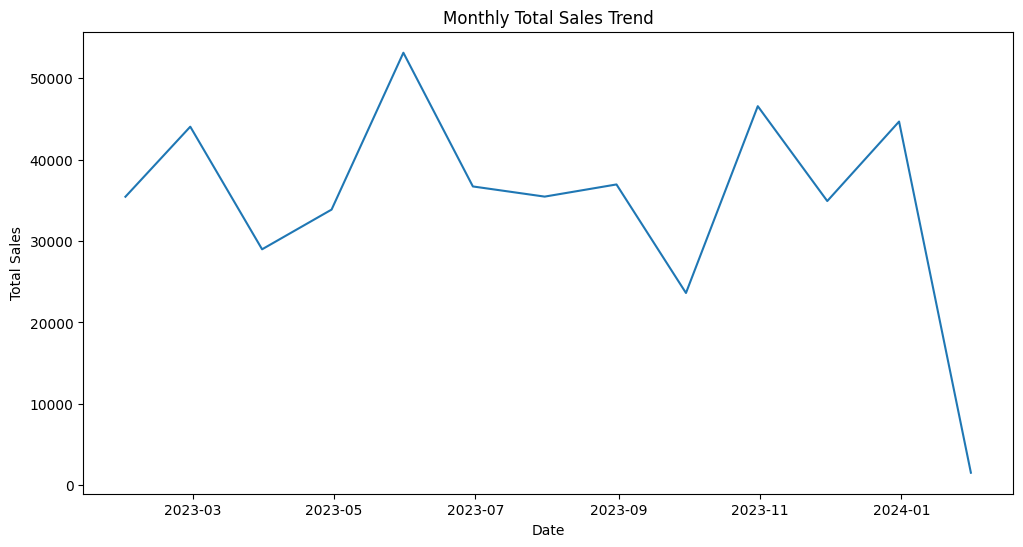

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales)
plt.title("Monthly Total Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

## Visualize relationships between variables

### Subtask:
Create visualizations to explore correlations between numerical variables (e.g., heatmaps of the correlation matrix).


**Reasoning**:
Calculate the correlation matrix and create a heatmap to visualize the correlations between numerical variables.



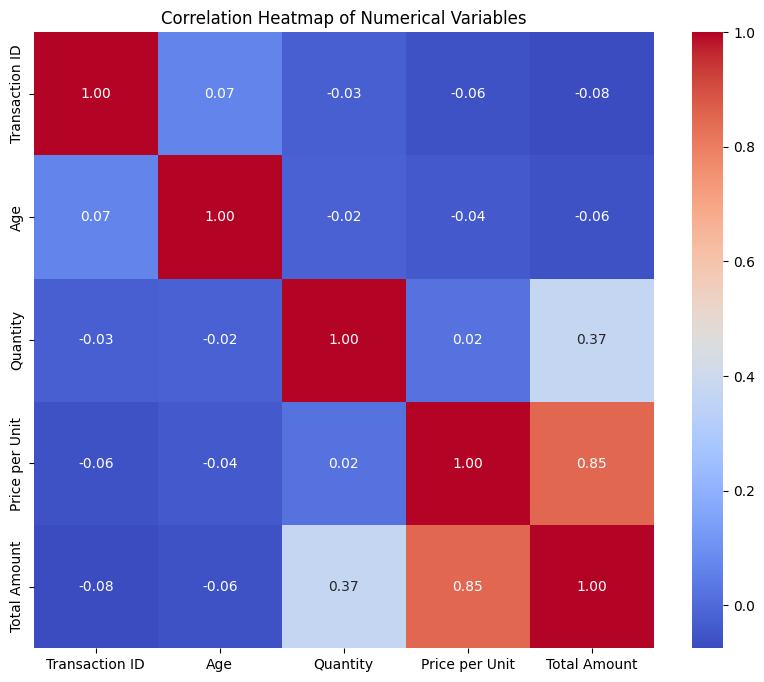

In [32]:
import seaborn as sns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

## Visualize sales trends

### Subtask:
Create visualizations to show sales trends over time (e.g., line plots of monthly sales).


**Reasoning**:
Create a figure with a specified size and generate a line plot of the monthly_sales data with appropriate title and axis labels.



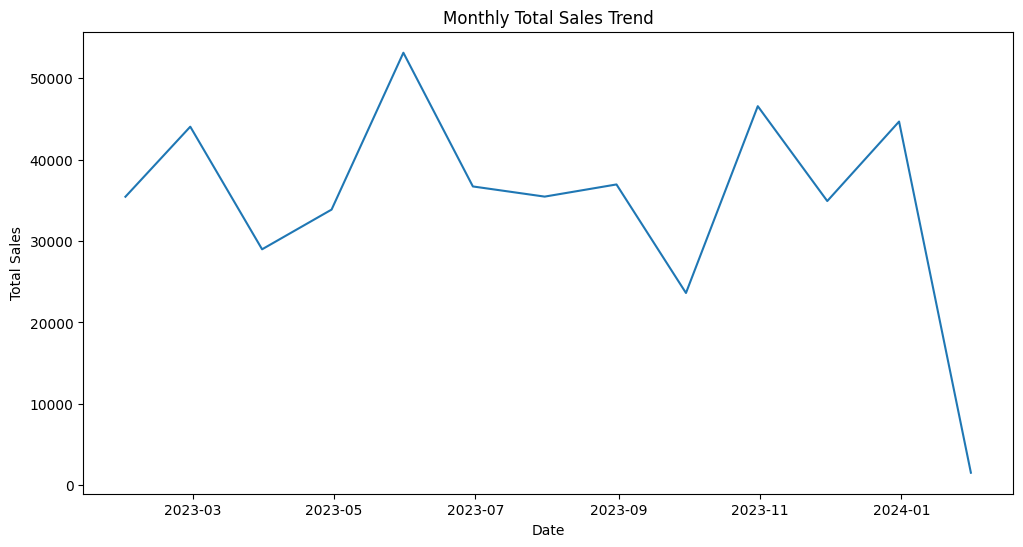

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales)
plt.title("Monthly Total Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

## Visualize customer demographics

### Subtask:
Create visualizations to show the distribution of age and gender (e.g., histograms for age, bar charts for gender).


**Reasoning**:
Generate a bar chart for gender distribution and a histogram for age distribution as requested in the subtask.



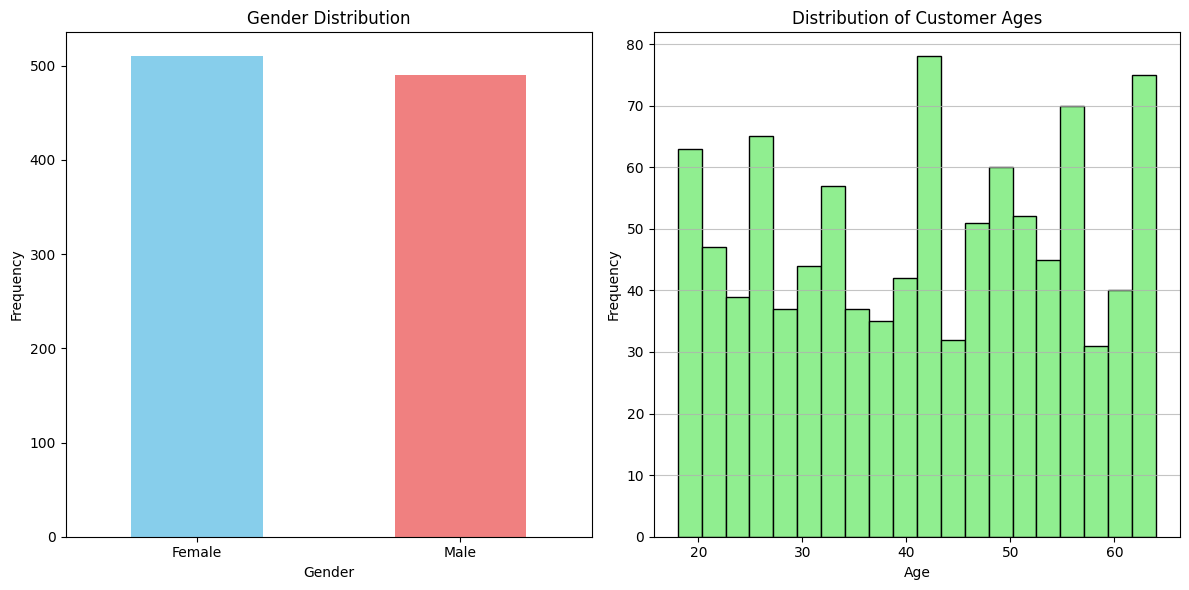

In [34]:
plt.figure(figsize=(12, 6))

# Bar chart for Gender Distribution
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
df['Gender'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.xticks(rotation=0)

# Histogram for Age Distribution
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
plt.hist(df['Age'], bins=20, edgecolor='black', color='lightgreen')
plt.title("Distribution of Customer Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)

plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

## Visualize purchasing behavior by demographics

### Subtask:
Create visualizations to show how purchasing patterns differ based on age and gender (e.g., box plots of total amount by gender, scatter plots of average total amount by age).


**Reasoning**:
Create a box plot to visualize the distribution of total amount by gender and a scatter plot to show the relationship between age and average total amount spent.



<Figure size 800x600 with 0 Axes>

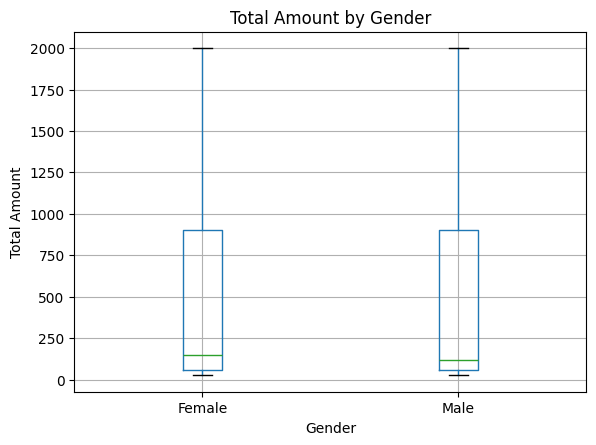

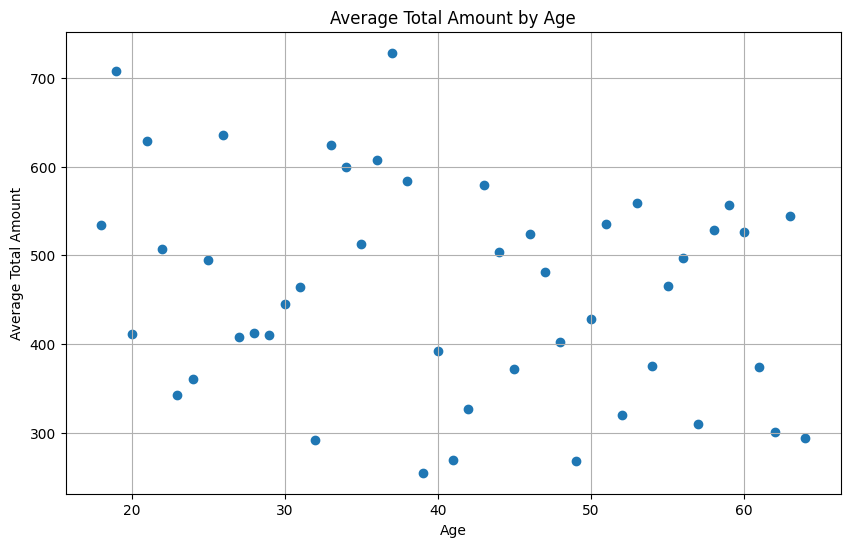

In [35]:
plt.figure(figsize=(8, 6))
df.boxplot(column='Total Amount', by='Gender')
plt.title("Total Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Amount")
plt.suptitle('')
plt.show()

avg_amount_by_age = df.groupby('Age')['Total Amount'].mean()

plt.figure(figsize=(10, 6))
plt.scatter(avg_amount_by_age.index, avg_amount_by_age.values)
plt.title("Average Total Amount by Age")
plt.xlabel("Age")
plt.ylabel("Average Total Amount")
plt.grid(True)
plt.show()

## Visualize purchasing behavior by product category

### Subtask:
Create visualizations to show the popularity and sales of different product categories (e.g., bar charts of total sales by category).


**Reasoning**:
Create and display a bar plot to visualize the total sales amount by product category.



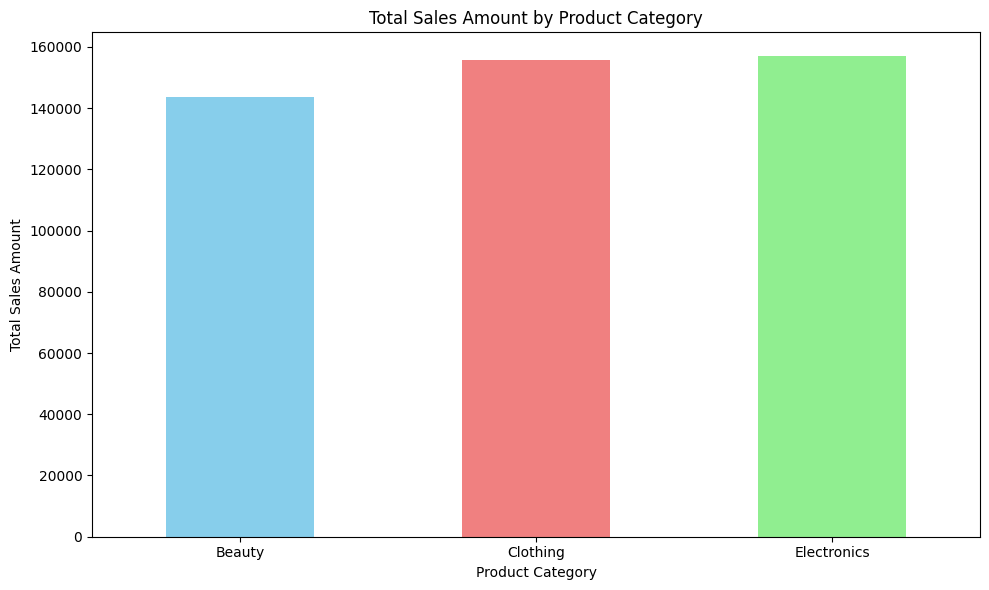

In [36]:
plt.figure(figsize=(10, 6))
total_sales_by_category.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title("Total Sales Amount by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   A line plot of monthly sales trends was generated.
*   A heatmap showing the correlation matrix of numerical variables was successfully created.
*   Customer demographics were visualized with a bar chart showing gender distribution and a histogram showing age distribution.
*   Purchasing behavior by demographics was explored through a box plot of total amount by gender and a scatter plot of average total amount by age.
*   A bar chart visualizing total sales amount by product category was created and displayed.


---


# Recommendations
Generate actionable recommendations based on the EDA findings.

## Review eda findings

### Subtask:
Review eda findings


## Identify areas for improvement

### Subtask:
Identify areas for improvement


## Formulate recommendations

### Subtask:
Formulate specific, actionable recommendations based on the identified areas for improvement.


**Reasoning**:
Formulate specific, actionable recommendations based on the identified areas for improvement from the previous subtask, focusing on increasing repeat customers and leveraging demographic and product category insights.



In [37]:
print("Actionable Recommendations based on EDA Findings:")
print("\n1. Increase Repeat Customers:")
print("- Implement a customer loyalty program to reward repeat purchases.")
print("- Send targeted promotions and discounts to existing customers.")
print("- Improve post-purchase customer engagement through surveys or follow-up emails.")
print("- Analyze the characteristics of customers who made more than one purchase (if any are identified in future data) to understand what drives repeat business.")

print("\n2. Leverage Demographic Insights:")
print("- Develop marketing campaigns tailored to the age groups with higher average spending.")
print("- Offer product recommendations based on gender preferences (while being mindful of not reinforcing stereotypes).")
print("- Consider introducing products or services that appeal to the age demographics with lower average spending to increase their engagement.")

print("\n3. Optimize Product Category Performance:")
print("- Investigate the reasons behind lower sales in the 'Beauty' category and explore strategies to boost its performance (e.g., promotions, new product lines).")
print("- Highlight top-performing categories like 'Electronics' and 'Clothing' in marketing efforts.")
print("- Analyze the purchasing patterns within each category to identify popular items and potential cross-selling opportunities.")

print("\n4. Data Collection and Analysis:")
print("- Collect more historical sales data to enable more robust time series analysis and better forecasting.")
print("- Track customer purchase history over time to accurately identify repeat customers and calculate customer lifetime value.")
print("- Gather more detailed customer information (e.g., location, interests) to create more personalized marketing strategies.")

Actionable Recommendations based on EDA Findings:

1. Increase Repeat Customers:
- Implement a customer loyalty program to reward repeat purchases.
- Send targeted promotions and discounts to existing customers.
- Improve post-purchase customer engagement through surveys or follow-up emails.
- Analyze the characteristics of customers who made more than one purchase (if any are identified in future data) to understand what drives repeat business.

2. Leverage Demographic Insights:
- Develop marketing campaigns tailored to the age groups with higher average spending.
- Offer product recommendations based on gender preferences (while being mindful of not reinforcing stereotypes).
- Consider introducing products or services that appeal to the age demographics with lower average spending to increase their engagement.

3. Optimize Product Category Performance:
- Investigate the reasons behind lower sales in the 'Beauty' category and explore strategies to boost its performance (e.g., promotio

## Prioritize recommendations

### Subtask:
Consider the potential impact and feasibility of each recommendation to prioritize them.


**Reasoning**:
Review the previously generated recommendations and assign priority levels based on potential impact and feasibility. Then, print the prioritized recommendations.



In [38]:
recommendations = [
    {
        "recommendation": "Implement a customer loyalty program to reward repeat purchases.",
        "impact": "High (Increase customer retention, potentially significant revenue growth)",
        "feasibility": "Medium (Requires planning, system implementation, and ongoing management)",
        "priority": "High"
    },
    {
        "recommendation": "Send targeted promotions and discounts to existing customers.",
        "impact": "High (Encourage repeat purchases, increase sales)",
        "feasibility": "High (Relatively easy to implement with existing customer data)",
        "priority": "High"
    },
    {
        "recommendation": "Improve post-purchase customer engagement through surveys or follow-up emails.",
        "impact": "Medium (Increase customer satisfaction, gather feedback for improvement)",
        "feasibility": "High (Relatively easy to implement)",
        "priority": "Medium"
    },
    {
        "recommendation": "Analyze the characteristics of customers who made more than one purchase (if any are identified in future data) to understand what drives repeat business.",
        "impact": "High (Provide data-driven insights for retention strategies)",
        "feasibility": "High (Requires data collection and analysis, but no immediate program implementation)",
        "priority": "High"
    },
    {
        "recommendation": "Develop marketing campaigns tailored to the age groups with higher average spending.",
        "impact": "High (Maximize revenue from valuable customer segments)",
        "feasibility": "Medium (Requires demographic data analysis and targeted marketing efforts)",
        "priority": "High"
    },
    {
        "recommendation": "Offer product recommendations based on gender preferences (while being mindful of not reinforcing stereotypes).",
        "impact": "Medium (Potentially increase sales through personalized recommendations)",
        "feasibility": "Medium (Requires analysis of purchase history by gender and implementation of recommendation system)",
        "priority": "Medium"
    },
    {
        "recommendation": "Consider introducing products or services that appeal to the age demographics with lower average spending to increase their engagement.",
        "impact": "Medium (Expand customer base and potentially increase overall sales)",
        "feasibility": "Medium to Low (Requires market research, product development, and potentially significant investment)",
        "priority": "Medium"
    },
    {
        "recommendation": "Investigate the reasons behind lower sales in the 'Beauty' category and explore strategies to boost its performance (e.g., promotions, new product lines).",
        "impact": "High (Increase sales in an underperforming category)",
        "feasibility": "Medium (Requires market research, competitive analysis, and marketing efforts)",
        "priority": "High"
    },
    {
        "recommendation": "Highlight top-performing categories like 'Electronics' and 'Clothing' in marketing efforts.",
        "impact": "Medium (Capitalize on existing strengths and drive further sales)",
        "feasibility": "High (Easy to implement in marketing materials)",
        "priority": "High"
    },
    {
        "recommendation": "Analyze the purchasing patterns within each category to identify popular items and potential cross-selling opportunities.",
        "impact": "High (Increase sales through targeted promotions and product bundling)",
        "feasibility": "Medium (Requires data analysis and implementation of cross-selling strategies)",
        "priority": "High"
    },
    {
        "recommendation": "Collect more historical sales data to enable more robust time series analysis and better forecasting.",
        "impact": "High (Improve accuracy of future sales predictions, better resource allocation)",
        "feasibility": "High (Data collection processes need to be established or improved)",
        "priority": "High"
    },
    {
        "recommendation": "Track customer purchase history over time to accurately identify repeat customers and calculate customer lifetime value.",
        "impact": "High (Essential for understanding customer loyalty and calculating CLTV)",
        "feasibility": "High (Requires setting up a system for tracking purchases per customer)",
        "priority": "High"
    },
    {
        "recommendation": "Gather more detailed customer information (e.g., location, interests) to create more personalized marketing strategies.",
        "impact": "Medium (Enable more effective and personalized marketing)",
        "feasibility": "Medium (Requires updating data collection methods and privacy considerations)",
        "priority": "Medium"
    }
]

# Prioritize recommendations
priority_order = {"High": 3, "Medium": 2, "Low": 1}
prioritized_recommendations = sorted(recommendations, key=lambda x: priority_order[x['priority']], reverse=True)

print("Prioritized Actionable Recommendations:")
for rec in prioritized_recommendations:
    print(f"\nPriority: {rec['priority']}")
    print(f"Recommendation: {rec['recommendation']}")
    print(f"Impact: {rec['impact']}")
    print(f"Feasibility: {rec['feasibility']}")

Prioritized Actionable Recommendations:

Priority: High
Recommendation: Implement a customer loyalty program to reward repeat purchases.
Impact: High (Increase customer retention, potentially significant revenue growth)
Feasibility: Medium (Requires planning, system implementation, and ongoing management)

Priority: High
Recommendation: Send targeted promotions and discounts to existing customers.
Impact: High (Encourage repeat purchases, increase sales)
Feasibility: High (Relatively easy to implement with existing customer data)

Priority: High
Recommendation: Analyze the characteristics of customers who made more than one purchase (if any are identified in future data) to understand what drives repeat business.
Impact: High (Provide data-driven insights for retention strategies)
Feasibility: High (Requires data collection and analysis, but no immediate program implementation)

Priority: High
Recommendation: Develop marketing campaigns tailored to the age groups with higher average sp

## Present recommendations

### Subtask:
Clearly articulate the recommendations and the rationale behind them.


**Reasoning**:
Iterate through the prioritized_recommendations list and print the priority, recommendation, impact, and feasibility for each recommendation.



In [39]:
print("Here are the prioritized actionable recommendations based on the EDA:")
for rec in prioritized_recommendations:
    print(f"\nPriority: {rec['priority']}")
    print(f"Recommendation: {rec['recommendation']}")
    print(f"Impact: {rec['impact']}")
    print(f"Feasibility: {rec['feasibility']}")

Here are the prioritized actionable recommendations based on the EDA:

Priority: High
Recommendation: Implement a customer loyalty program to reward repeat purchases.
Impact: High (Increase customer retention, potentially significant revenue growth)
Feasibility: Medium (Requires planning, system implementation, and ongoing management)

Priority: High
Recommendation: Send targeted promotions and discounts to existing customers.
Impact: High (Encourage repeat purchases, increase sales)
Feasibility: High (Relatively easy to implement with existing customer data)

Priority: High
Recommendation: Analyze the characteristics of customers who made more than one purchase (if any are identified in future data) to understand what drives repeat business.
Impact: High (Provide data-driven insights for retention strategies)
Feasibility: High (Requires data collection and analysis, but no immediate program implementation)

Priority: High
Recommendation: Develop marketing campaigns tailored to the age

## Summary:

### Data Analysis Key Findings

*   High-priority recommendations include implementing a customer loyalty program, sending targeted promotions to existing customers, analyzing characteristics of repeat customers, developing marketing campaigns for high-spending age groups, investigating low sales in the 'Beauty' category, highlighting top-performing categories, analyzing purchasing patterns for cross-selling, collecting more historical sales data, and tracking customer purchase history.
*   Medium-priority recommendations involve improving post-purchase customer engagement, offering product recommendations based on gender preferences, considering products for lower-spending age demographics, and gathering more detailed customer information.


